# Charpter 2

## Problem 2.1

Ex. 2.1 Suppose each of K-classes has an associated target tk, which is a
vector of all zeros, except a one in the kth position. Show that classifying to
the largest element of $\hat{y}$ amounts to choosing the closest target, $min_k||t_k − \hat{y}||$, if the elements of ˆy sum to one.

If $y_k=max(y)$ $T(y)=t_k$. Using Eq.(2.23) with $G_k => t_k$, $x=>\hat{y}$. Because $max(\hat{y})<1$, $max(Pr(t|Y=\hat{y})) = min_k||t_k-\hat(y)||$

## Problem 2.2

Show how to compute the Bayes decision boundary for the simulation example in Figure 2.5.

Decission boundary is where classes probabilities are equil. In considered case the vounndary is Pr(y=1|X=x)=Pr(y=0|X=x)=0.5
It is not clear what exact distribution in the book. Below there is simple case of two 2D normal distributions with different mean. Boundary in 2D plane is pdf1(x1,x2) = pdf2(x1,2)) (1). 

In [135]:
y=rep(0, 200)
y[101:200]=1
y

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [126]:
nd = function(x1, x2, mu1, mu2){
    return(1/sqrt(2*pi)*exp(-(x1-mu1)^2/2-(x2-mu2)^2/2))
    }

For simplicity for first and second distribution for x1 means $\mu_{11}=\mu_{21}$
In this case solution of Eq. (1) $x2 = (\mu_{12} + \mu_{22})/2$

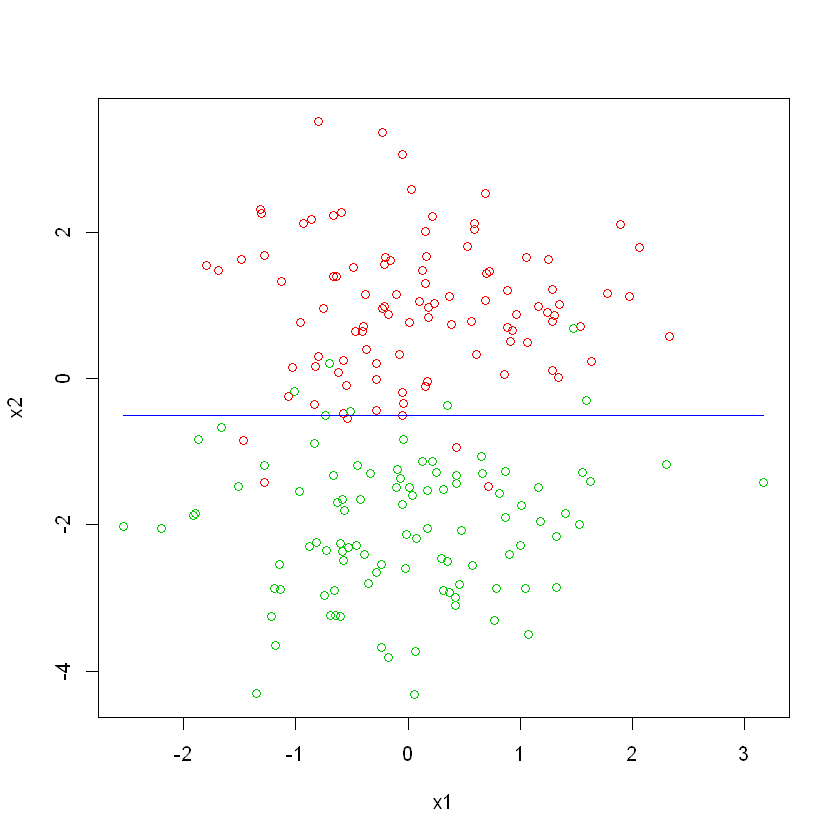

In [137]:
set.seed(4)
x1=rnorm(200, mean= 0)
x2=rnorm(200, mean= 1)
x1[101:200]=rnorm(100, mean = 0)
x2[101:200]=rnorm(100, mean = -2)
df=data.frame(cbind(x1,x2))
x1=df$x1
x2=df$x2
plot(x1, x2, col=y+2)
x2 = rep(-1/2, 200)  ##(mean12+mean21)/2
lines(x1, x2, col='blue', type='l')
#curve(nd(x1, x2, 1, 1)-nd(x1, x2, -2, -2), -5:5)

In [140]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

More general case 

In [159]:
install.packages("mvnfast", repos='http://cran.us.r-project.org')

also installing the dependency 'RcppArmadillo'




  There is a binary version available but the source version is later:
                   binary     source needs_compilation
RcppArmadillo 0.9.900.3.0 0.10.1.0.0              TRUE

  Binaries will be installed
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'mvnfast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kuzn1\AppData\Local\Temp\RtmpqSV4ez\downloaded_packages


In [151]:
library(magrittr)
library(tidyverse)
library(ggplot2)
library(gganimate)
library(patchwork)
theme_set(theme_linedraw() +
          theme(plot.title = element_text(size = 20),
                legend.position = "none",
                axis.text.x = element_blank(),
                axis.text.y = element_blank(),
                axis.title.x = element_blank(),
                axis.title.y = element_blank(),
                aspect.ratio = 1))
#' Make a sample layer
#'
#' @param data data.frame: a sample with continuous features `x` and `y`
#' grouped by factor `class`
#' @param classes (optional) a vector of which levels of `class` to
#' plot; default is to plot data from all classes
gg_sample <- function(data, classes = NULL, size = 3, alpha = 0.5, ...) {
    if (is.null(classes)) {
        subdata <- data
    } else {
        subdata <- filter(data, class %in% classes)
    }
    list(geom_point(data = subdata,
                    aes(x, y,
                        color = factor(class),
                        shape = factor(class)),
                    size = size,
                    alpha = alpha,
                    ...),
         scale_colour_discrete(drop = TRUE,
                               limits = levels(factor(data$class))))
}
#' Make a density layer
#'
#' @param data data.frame: a data grid of features `x` and `y` with contours `z`
#' @param data character: the name of the contour column 
gg_density <- function(data, z, size = 1, color = "black", alpha = 1, ...) {
    z <- ensym(z)
    geom_contour(data = data,
                 aes(x, y, z = !!z),
                 size = size,
                 color = color,
                 alpha = alpha,
                 ...)
}
#' Make an optimal boundary layer
#'
#' @param data data.frame: a data grid of features `x` and `y` with a column with
#' the `optimal` boundary contours
#' @param breaks numeric: which contour levels of `optimal` to plot
gg_optimal <- function(data, breaks = c(0), ...) {
    gg_density(data, z = optimal, breaks = breaks, ...)
}
#' Make a layer of component labels for a mixture distribution with two classes
#'
#' @param mus list(data.frame): the means for components of each class; every row
#' is a mean, each column is a coordinate
#' @param classes (optional) a vector of which levels of class to plot
gg_mix_label <- function(mus, classes = NULL, size = 10, ...) {
    ns <- map_int(mus, nrow)
    component <- do.call(c, map(ns, seq_len))
    class <- do.call(c, map2(0:(length(ns) - 1), ns, rep.int))
    mu_all <- do.call(rbind, mus)
    data <- cbind(mu_all, component, class) %>%
        set_colnames(c("x", "y", "component", "class")) %>%
        as_tibble()
    if (is.null(classes)) {
        subdata <- data
    } else {
        subdata <- filter(data, class %in% classes)
    }    
    list(shadowtext::geom_shadowtext(data = subdata,
                                     mapping = aes(x, y,
                                                   label = component,
                                                   color = factor(class)),
                                     size = size,
                                     ...),
         scale_colour_discrete(drop = TRUE,
                               limits = levels(factor(data$class))))
}

Warning message:
"package 'patchwork' was built under R version 3.6.3"

In [152]:
p <- 0.5
mu_0 <- c(0, 2)
sigma_0 <- matrix(c(1, 0.3, 0.3, 1), nrow = 2)
mu_1 <- c(2, 0)
sigma_1 <- matrix(c(1, -0.3, -0.3, 1), nrow = 2)

In [164]:
make_mvn_sample <- function(n, mu_0, sigma_0, mu_1, sigma_1, p_0) {
  n_0 <- rbinom(1, n, p_0)
    n_1 <- n - n_0
    sample_mvn <- as_tibble(
        rbind(mvnfast::rmvn(n_0,
                            mu = mu_0,
                            sigma = sigma_0),
              mvnfast::rmvn(n_1,
                            mu = mu_1,
                            sigma = sigma_1)))
    sample_mvn[1:n_0, 3] <- 0
    sample_mvn[(n_0 + 1):(n_0 + n_1), 3] <- 1
    sample_mvn <- sample_mvn[sample(nrow(sample_mvn)), ]
    colnames(sample_mvn) <- c("x", "y", "class")
    sample_mvn
}

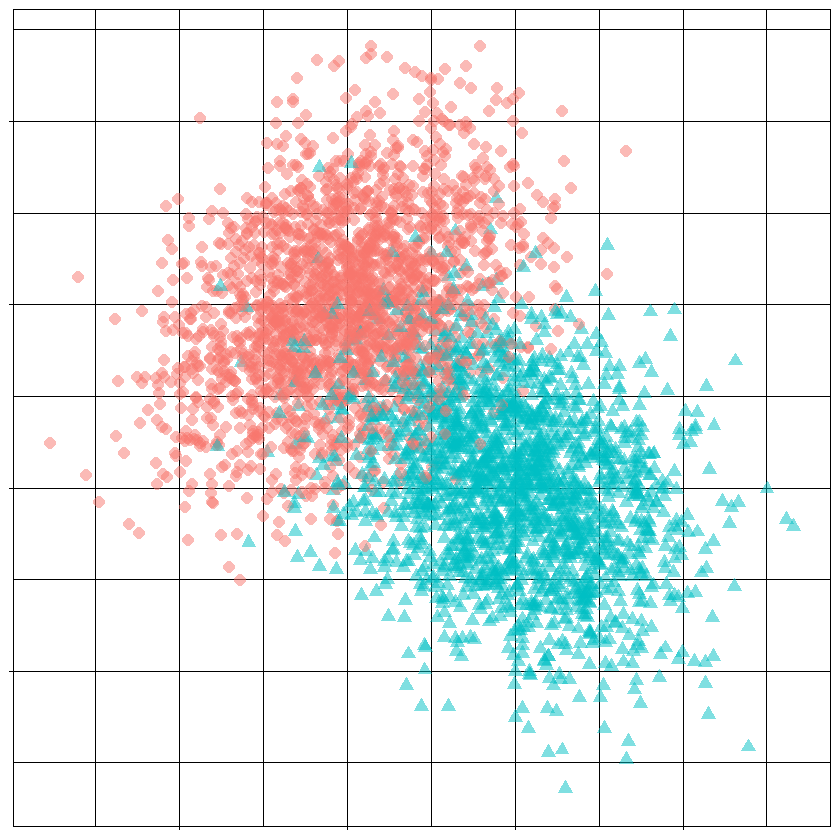

In [165]:
n <- 4000
set.seed(31415)
sample_mvn <- make_mvn_sample(n,
                              mu_0, sigma_0,
                              mu_1, sigma_1,
                              p)
ggplot() +
    gg_sample(sample_mvn) +
    coord_fixed()

In [166]:
#' Make an optimal prediction at a point from two class distributions
#'
#' @param x vector: input
#' @param p_0 double: prior probability of class 0
#' @param dfun_0 function(x): density of features of class 0
#' @param dfun_1 function(x): density of features of class 1
optimal_predict <- function(x, p_0, dfun_0, dfun_1) {
    ## Prior probability of class 1
    p_1 <- 1 - p_0
    ## Conditional probability of (x, y) given class 0
    p_x_0 <- dfun_0(x)
    ## Conditional probability of (x, y) given class 1
    p_x_1 <- dfun_1(x)
    ## Conditional probability of class 0 given (x, y)
    p_0_xy <- p_x_0 * p_0
    ## Conditional probability of class 1 given (x, y)
    p_1_xy <- p_x_1 * p_1
    optimal <- p_1_xy - p_0_xy
    class <- ifelse(optimal > 0, 1, 0)
    result <- c(p_0_xy, p_1_xy, optimal, class)
    names(result) <- c("p_0_xy", "p_1_xy", "optimal", "class")
    result
}
#' Construct a dataframe with posterior class probabilities and the
#' optimal decision boundary over a grid on the feature space
#' 
#' @param mean_0 vector: the mean vector of the first class
#' @param sigma_0 matrix: the 2x2 covariance matrix of the first class
#' @param mean_1 vector: the mean vector of the second class
#' @param sigma_1 matrix: the 2x2 covariance matrix of the second class
#' @param p_0 double: the prior probability of class 0
make_density_mvn <- function(mean_0, sigma_0, mean_1, sigma_1, p_0,
                             x_min, x_max, y_min, y_max, delta = 0.05) {
    x <- seq(x_min, x_max, delta)
    y <- seq(y_min, y_max, delta)
    density_mvn <- expand.grid(x, y)
    names(density_mvn) <- c("x", "y")
    dfun_0 <- function(x) mvnfast::dmvn(x, mu_0, sigma_0)
    dfun_1 <- function(x) mvnfast::dmvn(x, mu_1, sigma_1)
    optimal_mvn <- function(x, y) optimal_predict(c(x, y), p_0, dfun_0, dfun_1)
    density_mvn <-as.tibble(
        cbind(density_mvn,
              t(mapply(optimal_mvn,
                       density_mvn$x, density_mvn$y))))
    density_mvn
}

Warning message:
"`as.tibble()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session."

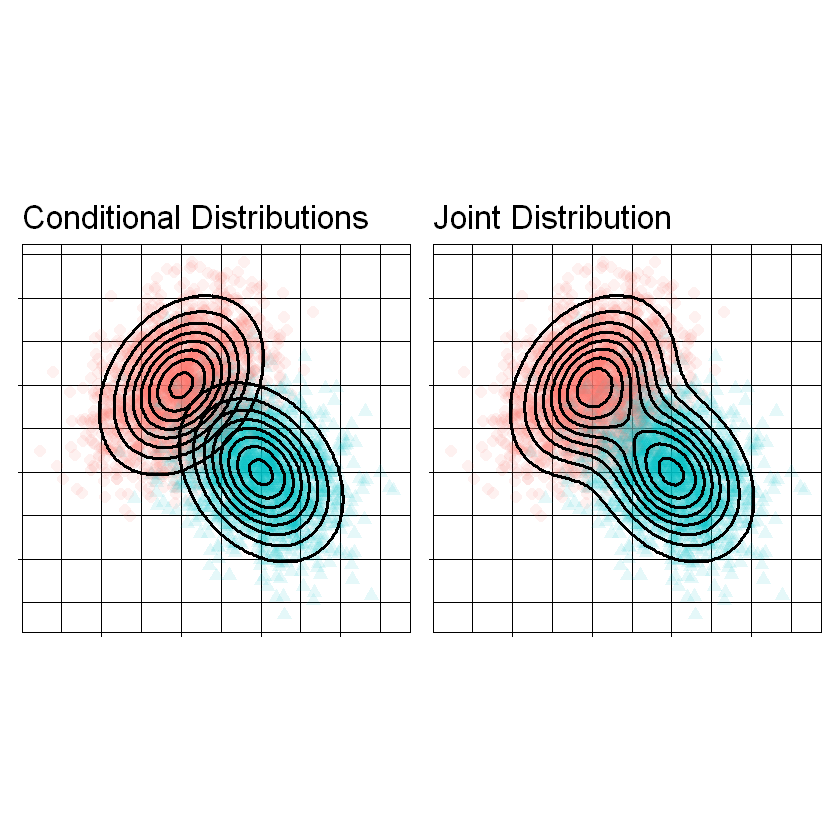

In [167]:
density_mvn <- make_density_mvn(mu_0, sigma_0, mu_1, sigma_1, p,
                                -3, 5, -3, 5)
(ggplot() +
 gg_sample(sample_mvn, alpha = 0.1) +
 gg_density(density_mvn, z = p_0_xy) +
 gg_density(density_mvn, z = p_1_xy) +
 ggtitle("Conditional Distributions")) +
(ggplot() +
 gg_sample(sample_mvn, alpha = 0.1) +
 geom_contour(data = density_mvn,
              aes(x = x, y = y, z = p_0_xy + p_1_xy),
              size = 1,
              color = "black") +
 ggtitle("Joint Distribution"))


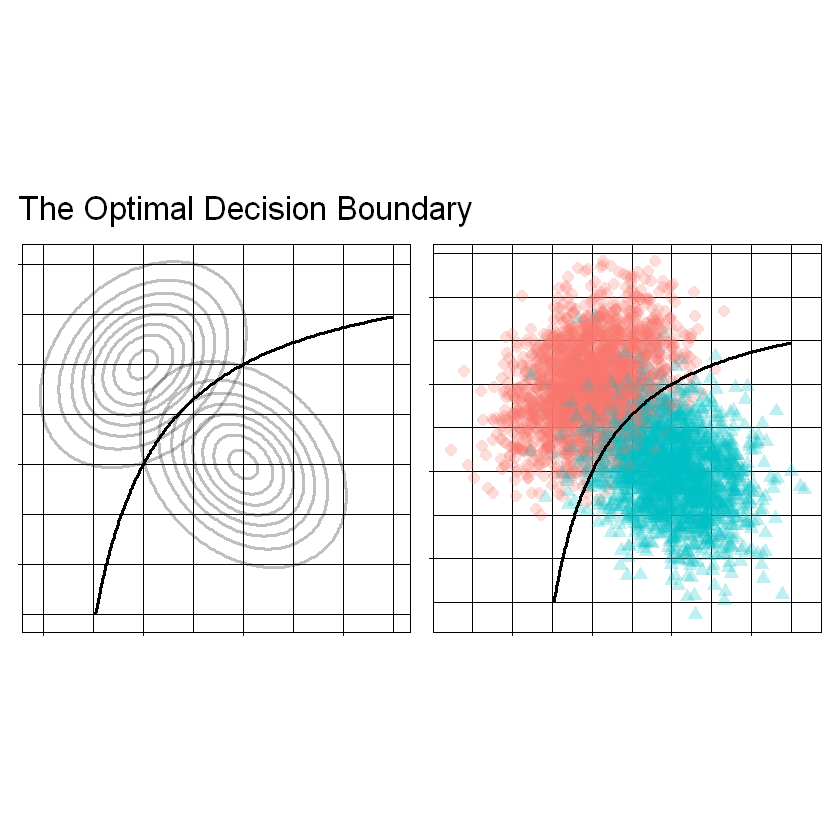

In [168]:
(ggplot() +
 gg_density(density_mvn, z = p_0_xy,
            alpha = 0.25) +
 gg_density(density_mvn, z = p_1_xy,
            alpha = 0.25) +
 gg_optimal(density_mvn)) +
(ggplot() +
 gg_sample(sample_mvn, alpha = 0.25) +
 gg_optimal(density_mvn)) +
plot_annotation("The Optimal Decision Boundary")

## Problem 3

Ex. 2.3 Derive equation (2.24).

Median distance corresponds to the volume where half of the particles is inside the volume and half is outside. Probability that particle is inside volume fraction v equils probability that observation is outside volume v, $(1-v)^{N} = 1-(1-v)^N ->v =1-0.5^{1/N}$ then $d(N, p)=(1-0.5^{1/N})^{1/p}$

## Problem 4

$z_i$ are projections of unit vector. Initial vector point in random direction randomly. Therefore it is clear that for projections in any direction we will have mean zero. For mean distance vector $\sum_{i=0}^n\sqrt{\sum_{j=0}^px_{ij}^2}/N=p$.
Because the vectors orientation is uniformly distributed in all directions. If sum in all directions equals p, for one direction we divide it by p:
$\sigma =\sqrt{\sum_{i=0}^n{x_{ij}^2}/N}=1$

## Problem 5